# Clase 03. Implementación en Keras del modelo hecho en clase anterior.

Se compara el desempeño del modelo de la clase anterior (ver Notebook "Keritas") con la misma arquitectura entrenada en Keras (no son exactamente lo mismos parámetros de Optimizer).

<a href="https://colab.research.google.com/github/nhorro/ceai2020/blob/master/deep_learning/clase_3/EjercicioKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Si la versión de TF es 1.14.0 corresponde a la ejecución con Keras incluído en Tensorflow del docker: [tensorflow1.12-py3-jupyter-opencv](https://github.com/nhorro/tensorflow1.12-py3-jupyter-opencv)

In [2]:
print(tf.__version__)

1.14.0


## 1. Definición de modelo

Misma arquitectura del ejercicio de la clase anterior:

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


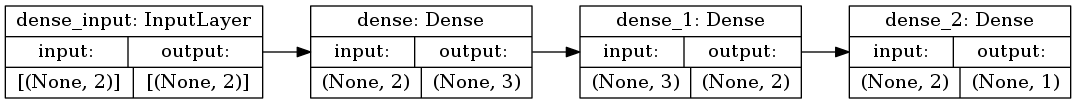

In [3]:
model = Sequential()
model.add(Dense(3, input_dim=2)) # input_dim son las variables de entrada
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) 
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## 2. Carga de dataset y entrenamiento

In [4]:
import numpy as np
TRAIN_DATASET_FILENAME = "../clase_2/data/clase_2_train_data.csv"
TEST_DATASET_FILENAME = "../clase_2/data/clase_2_test_data.csv"

train_ds = np.genfromtxt(TRAIN_DATASET_FILENAME, skip_header=True, delimiter=',')
X_train = train_ds[:,0:2]
y_train = train_ds[:,2:]
test_ds = np.genfromtxt(TEST_DATASET_FILENAME, skip_header=True, delimiter=',')
X_test = test_ds[:,0:2]
y_test = test_ds[:,2:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 2), (900, 1), (100, 2), (100, 1))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


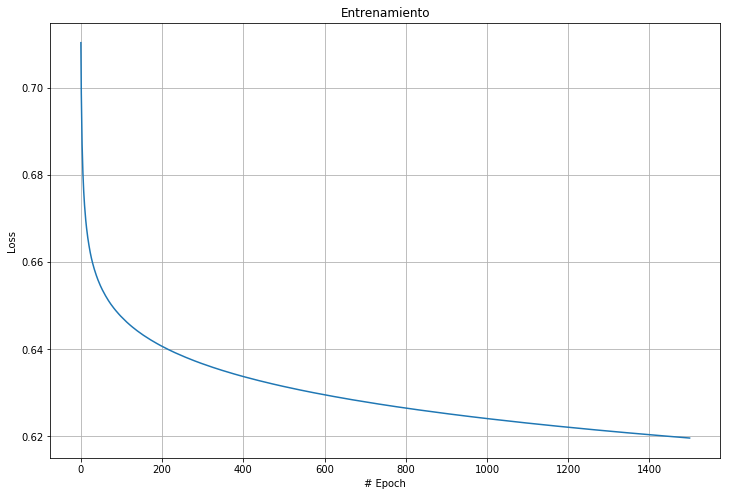

In [5]:
# No es exactamente el mismo optimizer
optimizer = tf.keras.optimizers.SGD(lr=0.1, decay=0.1, momentum=0.001, nesterov=False)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

num_epochs = 1500
batch_size = 256
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)

epochs = np.arange(0,len(history.history['loss']))
plt.figure(figsize=(12,8))
plt.plot(epochs,history.history['loss'])
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.grid(which="both")
plt.title("Entrenamiento")
plt.show()

## 3. Comparación con la implementación anterior en Numpy

In [6]:
#!pip install seaborn
import sys
sys.path.append("../../intro_ai/")
from libintroia.utils import plot_confusion_matrix
from libintroia.metrics import Precision, Accuracy, Recall
metrics = [ Precision(), Accuracy(), Recall() ]

Precision: 0.815
Accuracy: 0.7866666666666666
Recall: 0.7342342342342343
TP: 326, TN: 382, FP: 74, FN: 118


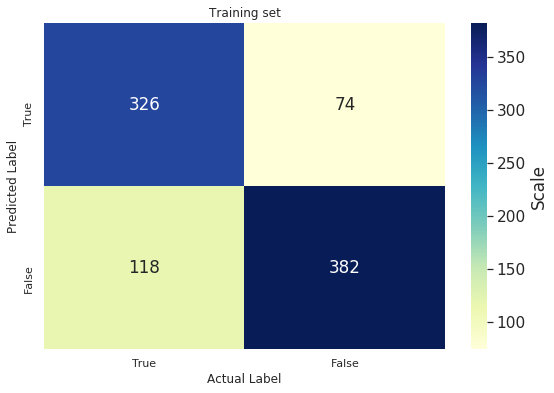

In [7]:
predicted = model.predict(X_train)
predicted[predicted<=0.5] = False
predicted[predicted>0.5] = True
actual = y_train
TP,TN,FP,FN = plot_confusion_matrix(predicted, actual, "Training set")
print("Precision:", metrics[0](actual,predicted))
print("Accuracy:", metrics[1](actual,predicted))
print("Recall:", metrics[2](actual,predicted))
print("TP: %d, TN: %d, FP: %d, FN: %d" % (TP,TN,FP,FN))

Precision: 0.8444444444444444
Accuracy: 0.75
Recall: 0.6785714285714286
TP: 38, TN: 37, FP: 7, FN: 18


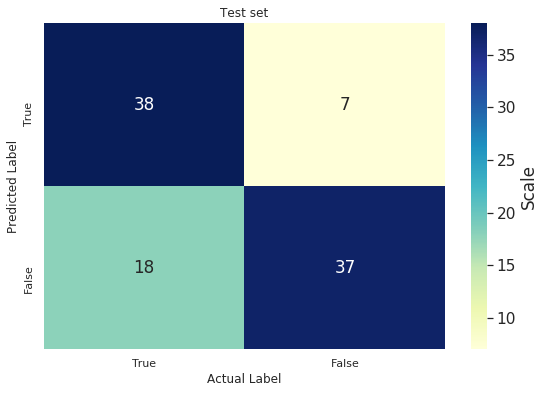

In [8]:
predicted = model.predict(X_test)
predicted[predicted<=0.5] = False
predicted[predicted>0.5] = True
actual = y_test
TP,TN,FP,FN = plot_confusion_matrix(predicted, actual, "Test set")
print("Precision:", metrics[0](actual,predicted))
print("Accuracy:", metrics[1](actual,predicted))
print("Recall:", metrics[2](actual,predicted))
print("TP: %d, TN: %d, FP: %d, FN: %d" % (TP,TN,FP,FN))

## Conclusiones

Comparación de desempeño en Test Set. 
- Los parámetros de entrenamiento son distintos porque el modelo "keritas" parece requerir más épocas.
- Algo raro es que está teniendo mucho peso el seed de random al hacer un restart kernel y se pasa de un modelo con métricas arriba de 0.8 a 0.5. TODO: entender causa y cómo se soluciona.


| Característica   | Modelo "keritas"  | Modelo Keras  |
|------------------|-------------------|---------------|
| Precision        | 0.76              | 0.84          |
| Accuracy         | 0.7               | 0.75          |
| Recall           | 0.67              | 0.67          |
| TP               | 38                | 38            |
| TN               | 32                | 37            |
| FP               | 12                | 7             |
| FN               | 18                | 18            |
